<a href="https://colab.research.google.com/github/KULDEEP-PATIDAR/Breast_Cancer_Classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

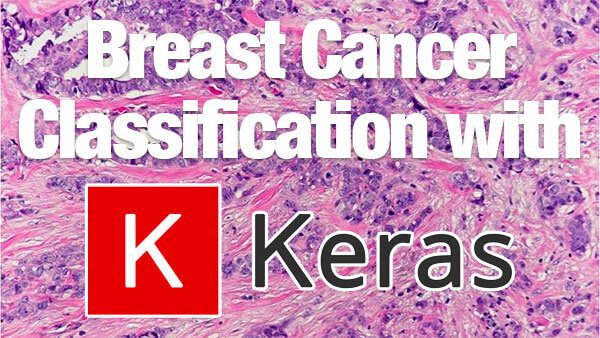



**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

**Data Collection and Processing**

In [ ]:
df = pd.read_csv("/content/data (1).csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df.head().shape

(5, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


0 --> Benign

1 --> Malignant

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [ ]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Separating the features and target

In [ ]:
X = df.drop(columns='diagnosis', axis=1)
Y = df['diagnosis']

In [ ]:
X.drop(columns='Unnamed: 32',inplace=True)

In [ ]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
X.shape

(569, 30)

In [ ]:
Y.shape

(569,)

In [ ]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [ ]:
df.shape

(569, 31)

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Splitting the data into training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled= scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(455, 30)

In [ ]:
Y_train.shape

(455,)

Building the Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from keras import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model= Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_train.shape

(455, 30)

In [ ]:
Y_train.shape

(455,)

In [ ]:
X_train_scaled.shape

(455, 30)

In [ ]:
model.fit(X_train_scaled,Y_train,batch_size=20,epochs=10,validation_data=(X_test_scaled,Y_test),verbose=1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8208 - loss: 0.4099 - val_accuracy: 0.8860 - val_loss: 0.3394
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9242 - loss: 0.2739 - val_accuracy: 0.9298 - val_loss: 0.2432
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9291 - loss: 0.2224 - val_accuracy: 0.9561 - val_loss: 0.1882
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9513 - loss: 0.1674 - val_accuracy: 0.9737 - val_loss: 0.1564
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9537 - loss: 0.1376 - val_accuracy: 0.9737 - val_loss: 0.1368
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9572 - loss: 0.1423 - val_accuracy: 0.9737 - val_loss: 0.1222
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9792 - loss: 0.1251 - val_accuracy: 0.9737 - val_loss: 0.1119
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9755 - loss: 0.1250 - val_accuracy: 0.9737 - v

In [ ]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def build_model(hp):
  model=Sequential()
  num_layers = hp.Int('num_layers', min_value=1, max_value=10)
  for i in range(num_layers):
    if i == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=30))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid'])))



  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
  return model



In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory="mydir",
                        project_name="myproject")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train_scaled,Y_train,epochs=5,validation_data=(X_test_scaled,Y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.6052631735801697

Best val_accuracy So Far: 0.9736841917037964
Total elapsed time: 00h 00m 36s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units0': 80,
 'activation0': 'tanh',
 'optimizer': 'adam',
 'units1': 80,
 'activation1': 'tanh',
 'units2': 32,
 'activation2': 'relu',
 'units3': 16,
 'activation3': 'tanh',
 'units4': 128,
 'activation4': 'relu',
 'units5': 104,
 'activation5': 'sigmoid',
 'units6': 72,
 'activation6': 'sigmoid',
 'units7': 16,
 'activation7': 'relu',
 'units8': 24,
 'activation8': 'tanh'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
history = model.fit(X_train_scaled,Y_train,epochs=200,initial_epoch=5,validation_data=(X_test_scaled,Y_test))

Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 3.0243e-05 - val_accuracy: 0.9561 - val_loss: 0.3901
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 3.0762e-05 - val_accuracy: 0.9561 - val_loss: 0.3905
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 2.9486e-05 - val_accuracy: 0.9561 - val_loss: 0.3910
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 2.9306e-05 - val_accuracy: 0.9561 - val_loss: 0.3912
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 2.9118e-05 - val_accuracy: 0.9561 - val_loss: 0.3915
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 2.9508e-05 - val_accuracy: 0.9561 - val_loss: 0.3920
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 2.9241e-05 - val_accuracy: 0.9561 - val_loss: 0.3925
Epoch 13/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 -

In [ ]:
def build_model2(hp):
  model=Sequential()
  num_layers = hp.Int('num_layers', min_value=1, max_value=10)
  for i in range(num_layers):
    if i == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=30))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))



  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
tuner2 = kt.RandomSearch(build_model2,
                        objective='val_accuracy',
                        max_trials=5,
                        directory="mydir",
                        project_name="myproject2")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner2.search(X_train_scaled,Y_train,epochs=5,validation_data=(X_test_scaled,Y_test))


Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.6052631735801697

Best val_accuracy So Far: 0.9561403393745422
Total elapsed time: 00h 00m 39s


In [ ]:
tuner2.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 48,
 'activation0': 'tanh',
 'dropout0': 0.1,
 'optimizer': 'nadam',
 'units1': 104,
 'activation1': 'relu',
 'dropout1': 0.8,
 'units2': 128,
 'activation2': 'sigmoid',
 'dropout2': 0.2,
 'units3': 8,
 'activation3': 'relu',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'relu',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'relu',
 'dropout5': 0.1,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.1,
 'units7': 8,
 'activation7': 'relu',
 'dropout7': 0.1}

In [ ]:
model2=tuner2.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 39 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
history2 = model2.fit(X_train_scaled,Y_train,epochs=200,initial_epoch=5,validation_data=(X_test_scaled,Y_test))

Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9833 - loss: 0.0378 - val_accuracy: 0.9649 - val_loss: 0.3144
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9737 - val_loss: 0.2965
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9850 - loss: 0.0766 - val_accuracy: 0.9737 - val_loss: 0.3003
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9862 - loss: 0.0260 - val_accuracy: 0.9737 - val_loss: 0.3073
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9930 - loss: 0.0474 - val_accuracy: 0.9737 - val_loss: 0.3135
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9931 - loss: 0.0309 - val_accuracy: 0.9737 - val_loss: 0.3153
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9923 - loss: 0.0314 - val_accuracy: 0.9649 - val_loss: 0.3339
Epoch 13/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9947 - loss: 0.0388 - val_accuracy

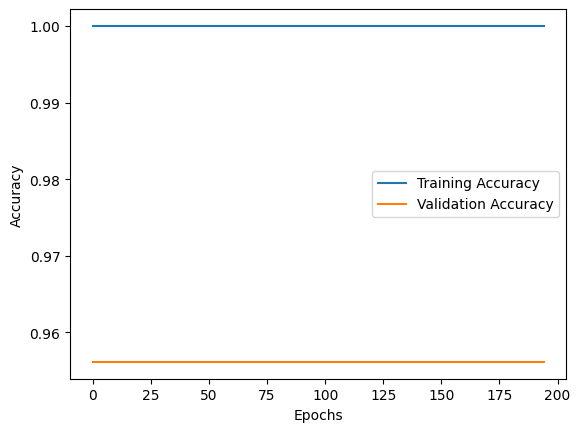

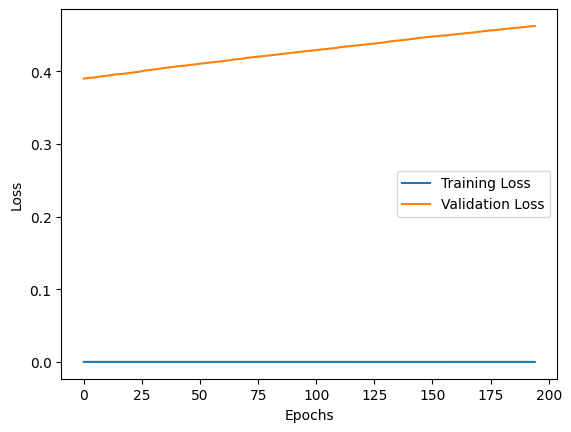

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


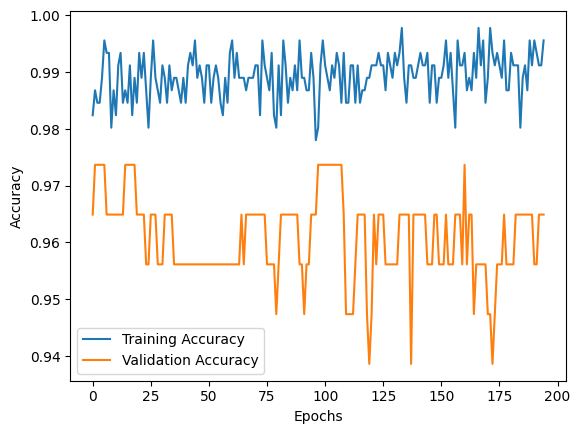

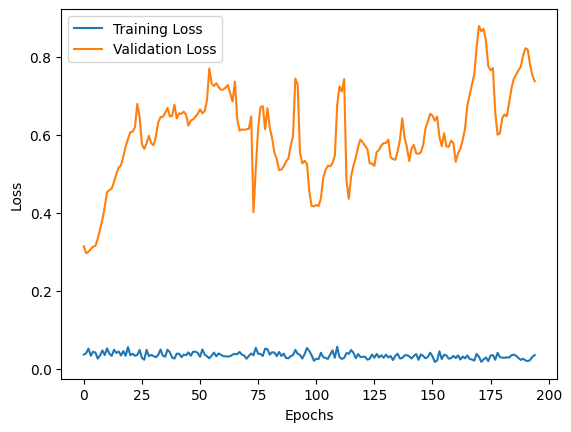

In [ ]:
# Accuracy plot
plt.figure()
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def build_model3(hp):
  model=Sequential()
  num_layers = hp.Int('num_layers', min_value=1, max_value=10)
  for i in range(num_layers):
    if i == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=30))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8,max_value=128,step=8),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))



  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner3 = kt.RandomSearch(build_model3,
                        objective='val_accuracy',
                        max_trials=5,
                        directory="mydir",
                        project_name="myproject3")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner3.search(X_train_scaled,Y_train,epochs=5,validation_data=(X_test_scaled,Y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.9561403393745422

Best val_accuracy So Far: 0.9736841917037964
Total elapsed time: 00h 00m 40s


In [ ]:
model3=tuner3.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history3 = model3.fit(
    X_train_scaled,
    Y_train,
    epochs=200,
    batch_size=32,
    initial_epoch=5,
    validation_data=(X_test_scaled, Y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9737 - loss: 0.1156 - val_accuracy: 0.9649 - val_loss: 0.0967
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9779 - loss: 0.1027 - val_accuracy: 0.9737 - val_loss: 0.0891
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9821 - loss: 0.0954 - val_accuracy: 0.9737 - val_loss: 0.0846
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9846 - loss: 0.0678 - val_accuracy: 0.9649 - val_loss: 0.0813
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9860 - loss: 0.0760 - val_accuracy: 0.9649 - val_loss: 0.0798
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9862 - loss: 0.0778 - val_accuracy: 0.9649 - val_loss: 0.0783
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9804 - loss: 0.0676 - val_accuracy: 0.9649 - val_loss: 0.0763
Epoch 13/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9813 - loss: 0.0645 - val_accuracy: 0.

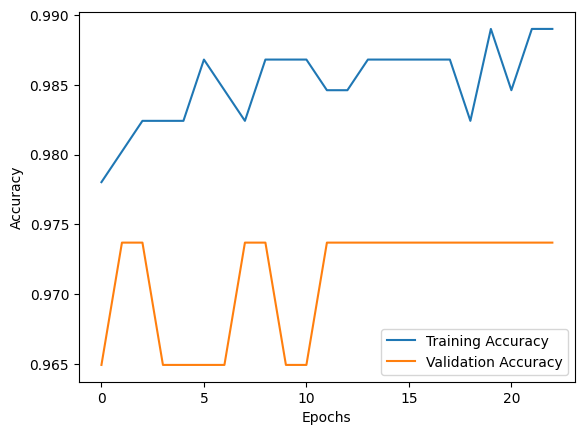

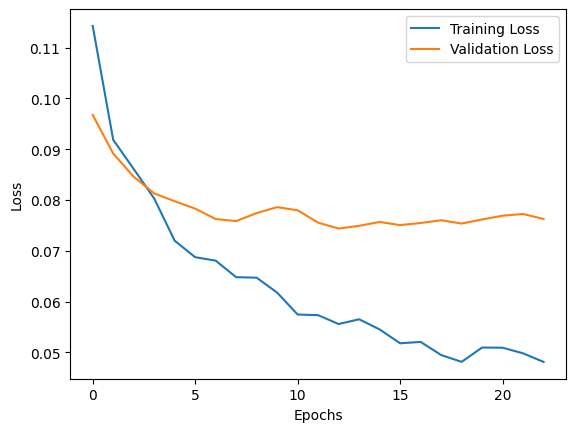

In [ ]:
plt.figure()
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()